<a href="https://colab.research.google.com/github/abdulwasaeee/Pytorch-Bootcamp/blob/main/pytorch-workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import torch
from  torch import nn
import matplotlib.pyplot as plt

In [56]:
torch.__version__

'2.8.0+cu126'

In [57]:
w= 0.7
b=0.3
x= torch.arange(0,1,0.02).unsqueeze(dim=1)
x

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [58]:
y= w*x + b
y

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [0.5100],
        [0.5240],
        [0.5380],
        [0.5520],
        [0.5660],
        [0.5800],
        [0.5940],
        [0.6080],
        [0.6220],
        [0.6360],
        [0.6500],
        [0.6640],
        [0.6780],
        [0.6920],
        [0.7060],
        [0.7200],
        [0.7340],
        [0.7480],
        [0.7620],
        [0.7760],
        [0.7900],
        [0.8040],
        [0.8180],
        [0.8320],
        [0.8460],
        [0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

In [59]:
len(x), len(y)

(50, 50)

In [60]:
trainsplit=int(0.8*len(x))
trainsplit

40

In [61]:
xtrain, ytrain= x[:trainsplit],   y[:trainsplit]
len(xtrain),    len(ytrain)

(40, 40)

In [62]:
xtest,  ytest= x[trainsplit:], y[trainsplit:]
len(xtest),    len(ytest)

(10, 10)

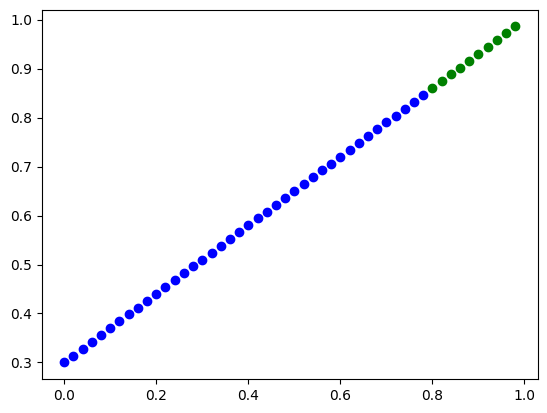

In [63]:
plt.scatter(xtrain, ytrain, c='b')
plt.scatter(xtest,    ytest, c='g')


In [64]:
class LRM(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.rand(1,dtype=torch.float),requires_grad=True)
    self.bias=nn.Parameter(torch.rand(1,dtype=torch.float),requires_grad=True)

  def forward(self, x):
    return self.weights * x + self.bias



In [65]:
torch.manual_seed(42)

model=LRM()
model

LRM()

In [66]:
list(model.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [67]:
model.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [68]:
with torch.inference_mode():
  ypreds=model(xtest)

ypreds

tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

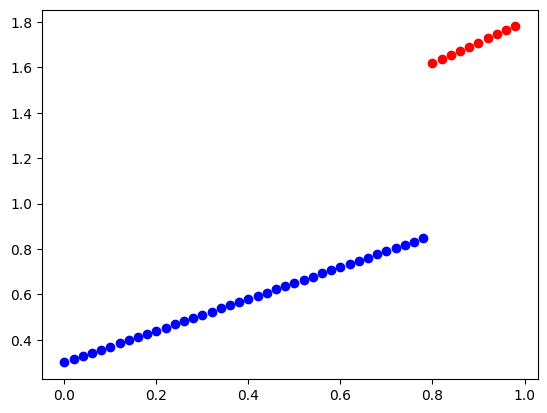

In [69]:
plt.scatter(xtrain, ytrain, c='b')
plt.scatter(xtest,ypreds,c='r')

In [70]:
lossfn= nn.L1Loss()

In [71]:
opt=torch.optim.Adam(params=model.parameters(), lr=0.01)

In [72]:
e=[]
t=[]
v=[]

In [73]:
torch.manual_seed(42)
epochs=100

for i in range(epochs):
  model.train()
  ypred= model(xtrain)
  loss= lossfn(ypred, ytrain)
  opt.zero_grad()
  loss.backward()
  opt.step()
  model.eval()
  with torch.inference_mode():
    testpred=model(xtest)
    testloss=lossfn(testpred,ytest)
    e.append(i)
    t.append(loss)
    v.append(testloss)
  if i%10==0:

    print(f"epoch: {i} | loss : {loss} | testloss: {testloss}")
    print(model.state_dict())


epoch: 0 | loss : 0.6860889196395874 | testloss: 0.758323609828949
OrderedDict({'weights': tensor([0.8723]), 'bias': tensor([0.9050])})
epoch: 10 | loss : 0.5470890998840332 | testloss: 0.5693238377571106
OrderedDict({'weights': tensor([0.7723]), 'bias': tensor([0.8050])})
epoch: 20 | loss : 0.40808922052383423 | testloss: 0.38032394647598267
OrderedDict({'weights': tensor([0.6723]), 'bias': tensor([0.7050])})
epoch: 30 | loss : 0.26908937096595764 | testloss: 0.1913241446018219
OrderedDict({'weights': tensor([0.5723]), 'bias': tensor([0.6050])})
epoch: 40 | loss : 0.13008949160575867 | testloss: 0.011395913548767567
OrderedDict({'weights': tensor([0.4723]), 'bias': tensor([0.5050])})
epoch: 50 | loss : 0.060536496341228485 | testloss: 0.1556810438632965
OrderedDict({'weights': tensor([0.3938]), 'bias': tensor([0.4168])})
epoch: 60 | loss : 0.06581138074398041 | testloss: 0.1845102608203888
OrderedDict({'weights': tensor([0.3989]), 'bias': tensor([0.3835])})
epoch: 70 | loss : 0.050840

In [74]:
model.state_dict()

OrderedDict([('weights', tensor([0.5866])), ('bias', tensor([0.3456]))])

In [75]:
w, b

(0.7, 0.3)

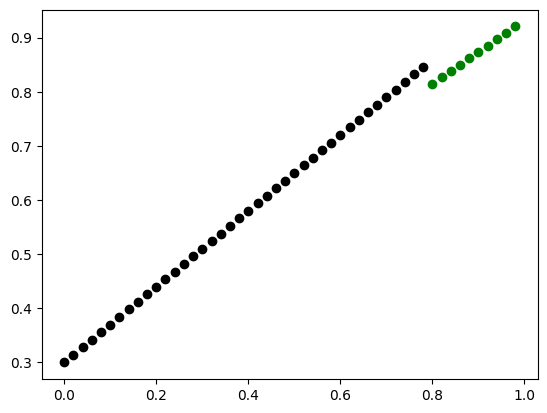

In [76]:
with torch.inference_mode():
  ypreds2=model(xtest)

plt.scatter(xtrain, ytrain, c='black')
plt.scatter(xtest,ypreds2,c='g')

In [77]:
t[1].detach().numpy()

array(0.672189, dtype=float32)

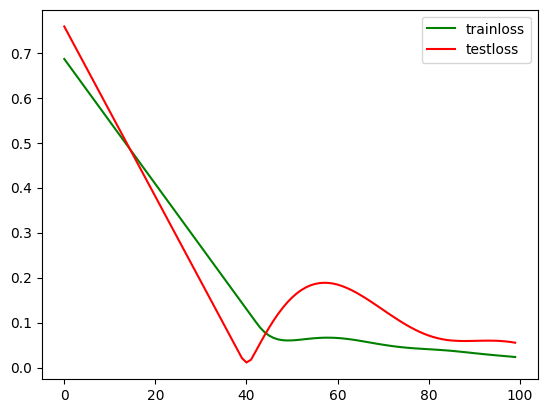

In [78]:
plt.plot(e, [tensor.detach().numpy() for tensor in t], label='trainloss', c='g')
plt.plot(e, [tensor.detach().numpy() for tensor in v], label='testloss', c='r')
plt.legend()

In [79]:
torch.save(model,'model.pt')

In [80]:
m2=torch.load('model.pt',weights_only=False)

In [81]:
m2(xtest)

tensor([[0.8149],
        [0.8266],
        [0.8383],
        [0.8501],
        [0.8618],
        [0.8735],
        [0.8853],
        [0.8970],
        [0.9087],
        [0.9205]], grad_fn=<AddBackward0>)

In [82]:
model.state_dict()

OrderedDict([('weights', tensor([0.5866])), ('bias', tensor([0.3456]))])

In [83]:
m2.state_dict()

OrderedDict([('weights', tensor([0.5866])), ('bias', tensor([0.3456]))])

In [85]:
m3=LRM()
m3.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [86]:
torch.save(model.state_dict(),'modeldict.pt')

In [88]:
m4=LRM()
m4.load_state_dict(torch.load('modeldict.pt'))
m4.state_dict()

OrderedDict([('weights', tensor([0.5866])), ('bias', tensor([0.3456]))])